# 0. Install Dependencies and Bring in Data

In [2]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn
#installing the required packages

In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
df = pd.read_csv('train.csv')
#reading the dataset

In [5]:
df.head()
#printing the first 5 rows of the dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail()
#printing the last 5 rows of the dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
df.iloc[1]['comment_text']
#printing the second comment from the dataset

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [8]:
df[df.columns[2:]].iloc[1]
#printing the label values of the second comment from the dataset(features)

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 1, dtype: int64

In [9]:
df[df['toxic']==1].head()
#showing a few examples of toxic comments

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


# 1. Preprocess

In [10]:
!pip list
#to check the currently installed packages

Package                            Version
---------------------------------- --------------------
absl-py                            1.2.0
aiohttp                            3.8.1
aiosignal                          1.2.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.2.0
anaconda-project                   0.10.1
analytics-python                   1.4.0
anyio                              3.6.1
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
async-timeout                      4.0.2
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           

In [11]:
from tensorflow.keras.layers import TextVectorization
#importing the TextVectorization library from tensorflow

In [12]:
X = df['comment_text']
y = df[df.columns[2:]].values
#splitting the data into two parts, the comment and it's labels (feature values)

In [13]:
df.columns
#getting the column headings

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [14]:
df[df.columns[2:]].values
#internal df just displays the column headings and outer df forms a table, now this is converted to a vector using the value function

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [15]:
MAX_FEATURES = 200000 # number of words in the vocabulary

In [16]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
#vectorization takes place here

In [17]:
vectorizer.adapt(X.values) #teaching the vectorizer the vocabulary where X.values converts from pandas to numpy

In [18]:
vectorizer('Hello World, Life is Great!')[:5] #sample cevtorization where only words get assigned values,not punctuations and extracting the first 5 values only 

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([286, 261, 305,   9, 275], dtype=int64)>

In [19]:
vectorized_text = vectorizer(X.values) #passing all comments and tokenizing all of the words

In [20]:
vectorized_text #printing the vectors for all comments, 159571 comments and 1800 words cqap limit per comment, if a comment does not have 1800 words, it's filled with 0s

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [21]:
len(X) #notice how the length of X dataframe is same as the shape of the vectorized text

159571

In [22]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
#creating a tensorflow data pipeline
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y)) #creating a dataset and mapping the tokens to labels
#now pre-processing data in four different steps
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent bottlenecks

In [23]:
batch_X,batch_y=dataset.as_numpy_iterator().next()
#prints the vectorized comment first and then prints it'c corresponding lables (features)

In [24]:
batch_X.shape #16 samples maxed out  at 1800 words

(16, 1800)

In [25]:
batch_y.shape #16 samples each having 6 vectors

(16, 6)

In [26]:
len(dataset) #outputs the number of batches, not samples

9974

In [27]:
train = dataset.take(int(len(dataset)*.7))
#creating the test partition (70% of the dataset taken into training partition)

val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
#creating the validation partition (next 20% of the dataset taken into validation partition)

test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))
#creating the test partition (last 10% taken for the test partition)


In [28]:
len(train) #number of batches in train partition

6981

In [29]:
len(val) #number of partitions in validation partition

1994

In [30]:
len(test) #number of partitions in test partition

997

In [31]:
train_generator=train.as_numpy_iterator() #a generator/iterator is created

In [32]:
train_generator.next() #helps in iterating over the batches

(array([[20435,     7,  3492, ...,     0,     0,     0],
        [  216,  3866,   537, ...,     0,     0,     0],
        [    2,   132,  1684, ...,     0,     0,     0],
        ...,
        [  250,    36,     6, ...,     0,     0,     0],
        [  654,   178,    18, ...,     0,     0,     0],
        [  103,     8,   653, ...,     0,     0,     0]], dtype=int64),
 array([[1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# 2. Create Sequential Model

In [33]:
from tensorflow.keras.models import Sequential #sequential is the easiest and fastest way to build this model
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding #importing layers

In [34]:
model = Sequential() #instantiates the sequential API so that the layers can be added
# Create the embedding layer, max_features+1 is the number of words and 32 is the features/attributes
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer- allows to pass information in both ways, for exmaple "I don't hate you",if it read from both sides, don't modifies the meaning of the sentence, had it been unidirectional left to right, hate would be the absolute sentiment output
model.add(Bidirectional(LSTM(32, activation='tanh'))) #32 LSTM layers and gpu acceleration increases in tanh
# Feature extractor Fully connected layers- 3 dense layers with relu activation
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer having 6 units as y also has 6 label values at last which helps in the training of the model
model.add(Dense(6, activation='sigmoid'))
#sigmoid activation converts the input values to values between 0 and 1, which is exactly what we want

In [35]:
y.shape #notice how it has 6 label values, hence the final dense layer has 6 units

(159571, 6)

In [36]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')
#BinaryCrossentropy is used in true-false (1 or 0) scenarios, which is exactly the case here


In [37]:
model.summary() #to take a look at all the details of the model, 64 units coming out of the LSTM layer as it is bidirectional, hence 32+32=64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [38]:
history = model.fit(train, epochs=1, validation_data=val) #recommended to run the epoch for 5-10 times in this particular dataset
#trains the model by passing the train dataset, epochs is the training time and validation data=val is the number of passes in the training process
#training loss of 0.0614 and validation loss of 0.0452

6981/6981 [==============================] - 6811s 975ms/step - loss: 0.0632 - val_loss: 0.0476


In [39]:
history.history #we get the accurate error values, since we run the epochs only once, a single set of 

{'loss': [0.0632132738828659], 'val_loss': [0.047577016055583954]}

In [40]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

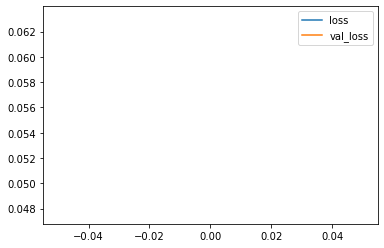

In [41]:
plt.figure(figsize=(8,5)) 
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [42]:
batch=test.as_numpy_iterator().next() 

In [43]:
batch_X,batch_y=test.as_numpy_iterator().next() #getting batch after batch of comments

In [44]:
batch_y #printing the assigned label values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [45]:
(model.predict(batch_X)>0.5).astype(int) #printinig the predicted label values

1/1 [==============================] - 8s 8s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [46]:
input_text = vectorizer('You freaking suck! I am going to hit you.') #now making a few predictions using sample text but first we need to vectorize them

In [47]:
model.predict(np.expand_dims(input_text,0)) #testing the custom entered text
#now 0.9 means its toxic and hence 0.1 in severe toxic means its not severelt toxic. 0.5 is the threshold, greater than 0.5 means it has that label chara teristic and less than 0.5 means it does  not.

1/1 [==============================] - 0s 134ms/step


array([[0.99800825, 0.05374614, 0.93768436, 0.00466324, 0.73577154,
        0.0546458 ]], dtype=float32)

In [48]:
df.columns[2:] #printing the label headings

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

# 4. Evaluate Model

In [49]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy #importing metrics for performace evaluation

In [50]:
pre = Precision() 
re = Recall()
acc = CategoricalAccuracy()

In [51]:
for batch in test.as_numpy_iterator(): #iterating over each batch in the data pipeline
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true) #generates the predicted vectors/arrays
    
    # Flatten the predictions
    y_true = y_true.flatten() #flattens down multiple arrays/vectors into a single buig array
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 157ms/step


In [52]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}') 
#these results will be for 1 epoch only, all parameters can be improved significantly by just bumping up the number of epochs and training the model for a longer period of time.

Precision: 0.7564544081687927, Recall:0.75, Accuracy:0.498495489358902


# 5. Test and Gradio

In [53]:
!pip install gradio jinja2

In [54]:
import tensorflow as tf
import gradio as gr

In [55]:
model.save('toxicity.h5') #saves the model


In [56]:
model = tf.keras.models.load_model('toxicity.h5')

In [57]:
input_str = vectorizer('hey i freaken hate you!')

In [58]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 1s/step


In [59]:
res

array([[0.89813405, 0.00763036, 0.45814863, 0.00442855, 0.44272125,
        0.03763101]], dtype=float32)

In [60]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [61]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Anaconda\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [62]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://25256.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x22434915430>,
 'http://127.0.0.1:7860/',
 'https://25256.gradio.app')

1/1 [==============================] - 0s 111ms/step
